# Synthetic Dataset Generation and UMAP Analysis

In this notebook, we will create a synthetic dataset to mimic measurements from microscopy images, such as intensity, aspect ratio, perimeter, and elongation. We will then apply UMAP to reduce the dimensionality of this dataset, integrate the UMAP results back into our dataframe, and finally visualize the results using seaborn.

## Import Required Libraries

First, let's make sure we have all the necessary libraries imported for this task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


## Generate Synthetic Dataset

We will now generate a synthetic dataset with random values for the following cell characteristics:
- Intensity
- Aspect Ratio
- Perimeter
- Elongation

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
intensity = np.random.rand(n_samples)
aspect_ratio = np.random.rand(n_samples)
perimeter = np.random.rand(n_samples)
elongation = np.random.rand(n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Intensity': intensity,
    'Aspect Ratio': aspect_ratio,
    'Perimeter': perimeter,
    'Elongation': elongation
})

# Display the first few rows of the DataFrame
data.head()

,Intensity,Aspect Ratio,Perimeter,Elongation
0,0.374540,0.031429,0.642032,0.051682
1,0.950714,0.636410,0.084140,0.531355
2,0.731994,0.314356,0.161629,0.540635
3,0.598658,0.508571,0.898554,0.637430
4,0.156019,0.907566,0.606429,0.726091


## Standardize the Data

Standardizing the data is important before applying UMAP to ensure all features contribute equally.

In [3]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Apply UMAP

Next, we will apply UMAP to reduce the dimensionality of the data to 2 components.

In [4]:
# Initialize UMAP
reducer = umap.UMAP(n_components=2, random_state=42)

# Fit and transform data
umap_results = reducer.fit_transform(data_scaled)

# Add UMAP results to the DataFrame
data['UMAP1'] = umap_results[:, 0]
data['UMAP2'] = umap_results[:, 1]

# Display the first few rows of the updated DataFrame
data.head()

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,Intensity,Aspect Ratio,Perimeter,Elongation,UMAP1,UMAP2
0,0.374540,0.031429,0.642032,0.051682,1.017793,8.046548
1,0.950714,0.636410,0.084140,0.531355,4.063331,6.550923
2,0.731994,0.314356,0.161629,0.540635,3.563985,7.274538
3,0.598658,0.508571,0.898554,0.637430,2.101726,6.685811
4,0.156019,0.907566,0.606429,0.726091,6.559728,5.784659


## Visualize the UMAP Results

Finally, let's visualize the UMAP results using seaborn and save the plot as a PNG file.

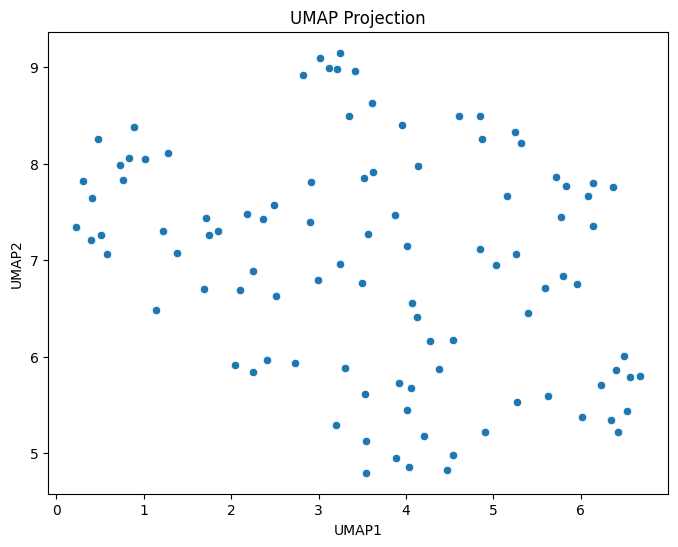

In [5]:
# Plot UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=data)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Save plot as PNG
plt.savefig('umap_projection.png')

# Show plot
plt.show()